# Introduction

 In this assignment, we will delve into dimensionality reduction and unsupervised learning
 tasks. Firstly, we should preprocess the provided dataset to prepare it for analysis. Next, we
 will apply dimensionality reduction techniques to simplify the dataset's complexity. Then, we
 will use unsupervised learning algorithms to tackle the task. Finally, we evaluate and analyze
 the results for comparison.

## Dataset

 In 2014, some researchers published an article called "Impact of c1HbA Measurement on
 Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records." They
 gathered data on diabetic patients from many hospitals and clinics in America. Some of this
 data, about 200,000 items with 50 features, has been shared with the public in a way that
 keeps people's identities private

# Implementation 

## Import Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## 1.Preprocessing

Data Preprocessing or Data Preparation is a data mining technique that transforms raw data into an understandable format for ML algorithms. Real-world data is usually noisy (contains errors, outliers, duplicates), incomplete (some values are missed), and
 could be stored in different places and different formats. The task of Data Preprocessing is to handle these issues.  
The dataset contains both numerical and textual values, along with outliers and null values. These inconsistencies can disrupt clustering accuracy. Normalize the data extensively and provide detailed explanations for each normalization step in the report file.

### Load Data

In [79]:
ids_mapping = pd.read_csv('dataset_diabetes/IDs_mapping.csv')
ids_mapping = ids_mapping.rename(columns={'admission_type_id': 'id'})
ids_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           65 non-null     object
 1   description  62 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [80]:
def split_dataframe_on_empty_row(df):
    empty_row_indices = df.index[df.isnull().all(axis=1)].tolist() 
    _sections = []
    start_idx = 0
    for idx in empty_row_indices:
        _sections.append(df.iloc[start_idx:idx].reset_index(drop=True))
        start_idx = idx + 2
    _sections.append(df.iloc[start_idx:].reset_index(drop=True))
    return _sections

sections = split_dataframe_on_empty_row(ids_mapping)

sections = [section for section in sections if not section.empty]

admission_type_mapping = sections[0].rename(columns={'id': 'admission_type_id', 'description': 'admission_type_desc'})
discharge_disposition_mapping = sections[1].rename(columns={'id': 'discharge_disposition_id', 'description': 'discharge_disposition_desc'})
admission_source_mapping = sections[2].rename(columns={'id': 'admission_source_id', 'description': 'admission_source_desc'})

In [81]:
del ids_mapping

### Get basic information about each DataFrame

In [82]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')

In [83]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [85]:
admission_type_mapping

,admission_type_id,admission_type_desc
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [86]:
discharge_disposition_mapping

,discharge_disposition_id,discharge_disposition_desc
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


In [87]:
admission_source_mapping

,admission_source_id,admission_source_desc
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


### Map the IDs to descriptions in diabetic_data

In [88]:
admission_type_mapping['admission_type_id'] = admission_type_mapping['admission_type_id'].astype('int64')
discharge_disposition_mapping['discharge_disposition_id'] = discharge_disposition_mapping['discharge_disposition_id'].astype('int64')
admission_source_mapping['admission_source_id'] = admission_source_mapping['admission_source_id'].astype('int64')

In [89]:
df = df.merge(admission_type_mapping, on='admission_type_id', how='left')
df = df.merge(discharge_disposition_mapping, on='discharge_disposition_id', how='left')
df = df.merge(admission_source_mapping, on='admission_source_id', how='left')

for col in ['admission_type', 'discharge_disposition', 'admission_source']:
    df = df.rename(columns={f'{col}_desc': col})
del col

In [90]:
df = df.drop(columns=["admission_type_id", "discharge_disposition_id", "admission_source_id"])

In [91]:
df.head(4)

,encounter_id,patient_nbr,race,gender,age,weight,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source
0,2278392,8222157,Caucasian,Female,[0-10),?,1,?,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
1,149190,55629189,Caucasian,Female,[10-20),?,3,?,?,59,...,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),?,2,?,?,11,...,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),?,2,?,?,44,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room


###  Convert to Numeric Type (Midpoint of Range) for Column "Age"

In [92]:
def extract_midpoint(value):
    value = value.strip('[]()')
    lower, upper = value.split('-')
    return (int(lower) + int(upper)) / 2

def process_range_columns(df):
    for _col in df.columns:
        if df[_col].dtype == 'object':
            mask = df[_col].str.match(r'^\[\d+-\d+\)$') & df[_col].notna()
            if mask.any():
                df.loc[mask, _col] = df.loc[mask, _col].apply(extract_midpoint)
                df[_col] = pd.to_numeric(df[_col], errors='coerce')
    return df

df= process_range_columns(df)

### Identify numerical/categorical columns

In [93]:
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        continue

In [94]:
categorical_columns = []
categorical_columns.extend(df.select_dtypes(include=['object']).columns)
id_columns = [col for col in df.columns if col.endswith('id')]
categorical_columns.extend(id_columns)
categorical_columns.extend(['patient_nbr', 'payer_code'])
categorical_columns = list(set(categorical_columns))
categorical_columns

['max_glu_serum',
 'medical_specialty',
 'diabetesMed',
 'pioglitazone',
 'glyburide',
 'admission_type',
 'acetohexamide',
 'glipizide',
 'change',
 'discharge_disposition',
 'chlorpropamide',
 'patient_nbr',
 'nateglinide',
 'acarbose',
 'insulin',
 'diag_1',
 'tolbutamide',
 'miglitol',
 'readmitted',
 'A1Cresult',
 'glyburide-metformin',
 'diag_2',
 'metformin-pioglitazone',
 'diag_3',
 'repaglinide',
 'payer_code',
 'encounter_id',
 'glipizide-metformin',
 'metformin',
 'rosiglitazone',
 'glimepiride-pioglitazone',
 'troglitazone',
 'metformin-rosiglitazone',
 'tolazamide',
 'race',
 'admission_source',
 'citoglipton',
 'gender',
 'glimepiride',
 'examide']

In [95]:
numerical_columns = [col for col in df.columns if col not in categorical_columns]
numerical_columns

['age',
 'weight',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

### standardize text columns

In [96]:
text_columns = df.select_dtypes(include=['object']).columns
text_columns.values

array(['race', 'gender', 'payer_code', 'medical_specialty', 'diag_1',
       'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type', 'discharge_disposition', 'admission_source'],
      dtype=object)

In [97]:
for col in text_columns:
    df[col] = df[col].str.strip()  # Remove leading/trailing spaces

### Standardize Numerical Data

In [98]:
from sklearn.preprocessing import StandardScaler

df = pd.concat([df[categorical_columns], 
                pd.DataFrame(data=StandardScaler().fit_transform(df[numerical_columns].values), columns=numerical_columns)], axis=1)

In [99]:
df.head(5)

,max_glu_serum,medical_specialty,diabetesMed,pioglitazone,glyburide,admission_type,acetohexamide,glipizide,change,discharge_disposition,...,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,NaN,Pediatrics-Endocrinology,No,No,No,NaN,No,No,No,Not Mapped,...,-3.824600,NaN,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596
1,NaN,?,Yes,No,No,Emergency,No,No,Ch,Discharged to home,...,-3.197277,NaN,-0.467653,0.808384,-0.785398,0.243390,-0.291461,-0.21262,-0.503276,0.815784
2,NaN,?,Yes,No,No,Emergency,No,Steady,No,Discharged to home,...,-2.569954,NaN,-0.802651,-1.631351,2.145781,-0.371804,1.286748,-0.21262,0.288579,-0.735733
3,NaN,?,Yes,No,No,Emergency,No,No,Ch,Discharged to home,...,-1.942632,NaN,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,-0.21262,-0.503276,-0.218561
4,NaN,?,Yes,No,No,Emergency,No,Steady,Ch,Discharged to home,...,-1.315309,NaN,-1.137649,0.401761,-0.785398,-0.986997,-0.291461,-0.21262,-0.503276,-1.252906


### Remove duplicates

In [100]:
df = df.drop_duplicates()

### Handling Missing and Invalid Values 

In [101]:
def find_invalid_values(_df):
    placeholder_values = ["Unknown/Invalid", "NaN", "Not Available", "Not Mapped", "?"]
    
    placeholder_counts = {}
    
    for _col in _df.columns:
        placeholder_counts[_col] = {}
        for value in placeholder_values:
            placeholder_counts[_col][value] = _df[_col].astype(str).str.contains(re.escape(value), case=False, na=False).sum()
    _placeholder_counts_df = pd.DataFrame(placeholder_counts).transpose()
    _placeholder_counts_df = _placeholder_counts_df[(_placeholder_counts_df.T != 0).any()]
    total_rows = len(_df)
    _percentage_df = (_placeholder_counts_df / total_rows) * 100
    _percentage_df["sum"] = (_percentage_df["Unknown/Invalid"] 
                             + _percentage_df["NaN"] 
                             + _percentage_df["Not Available"] 
                             + _percentage_df["Not Mapped"] 
                             +  _percentage_df["?"])
    return _percentage_df

In [102]:
unknown = find_invalid_values(df)
unknown

,Unknown/Invalid,NaN,Not Available,Not Mapped,?,sum
max_glu_serum,0.000000,94.746772,0.000000,0.000000,0.000000,94.746772
medical_specialty,0.000000,0.000000,0.000000,0.000000,49.082208,49.082208
admission_type,0.000000,5.199182,4.701963,0.314447,0.000000,10.215593
discharge_disposition,0.000000,3.626948,0.000000,0.971837,0.000000,4.598785
diag_1,0.000000,0.000000,0.000000,0.000000,0.020636,0.020636
A1Cresult,0.000000,83.277322,0.000000,0.000000,0.000000,83.277322
diag_2,0.000000,0.000000,0.000000,0.000000,0.351787,0.351787
diag_3,0.000000,0.000000,0.000000,0.000000,1.398306,1.398306
payer_code,0.000000,0.000000,0.000000,0.000000,39.557416,39.557416
race,0.000000,0.000000,0.000000,0.000000,2.233555,2.233555


In [103]:
columns_to_remove = unknown[unknown['sum']> 40].index
print("Columns with more than 40% unknown values:")
columns_to_remove

Columns with more than 40% unknown values:


Index(['max_glu_serum', 'medical_specialty', 'A1Cresult', 'weight'], dtype='object')

In [104]:
not_important = []
id_columns = [col for col in df.columns if col.endswith('id')]
not_important.extend(id_columns)
not_important.extend(['patient_nbr', 'payer_code'])
not_important

['encounter_id', 'patient_nbr', 'payer_code']

In [105]:
df = df.drop(columns=columns_to_remove)
df = df.drop(columns=not_important)

In [106]:
df.head()

,diabetesMed,pioglitazone,glyburide,admission_type,acetohexamide,glipizide,change,discharge_disposition,chlorpropamide,nateglinide,...,examide,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,No,No,No,NaN,No,No,No,Not Mapped,No,No,...,No,-3.824600,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596
1,Yes,No,No,Emergency,No,No,Ch,Discharged to home,No,No,...,No,-3.197277,-0.467653,0.808384,-0.785398,0.243390,-0.291461,-0.21262,-0.503276,0.815784
2,Yes,No,No,Emergency,No,Steady,No,Discharged to home,No,No,...,No,-2.569954,-0.802651,-1.631351,2.145781,-0.371804,1.286748,-0.21262,0.288579,-0.735733
3,Yes,No,No,Emergency,No,No,Ch,Discharged to home,No,No,...,No,-1.942632,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,-0.21262,-0.503276,-0.218561
4,Yes,No,No,Emergency,No,Steady,Ch,Discharged to home,No,No,...,No,-1.315309,-1.137649,0.401761,-0.785398,-0.986997,-0.291461,-0.21262,-0.503276,-1.252906


In [107]:
find_invalid_values(df)

,Unknown/Invalid,NaN,Not Available,Not Mapped,?,sum
admission_type,0.000000,5.199182,4.701963,0.314447,0.000000,10.215593
discharge_disposition,0.000000,3.626948,0.000000,0.971837,0.000000,4.598785
diag_1,0.000000,0.000000,0.000000,0.000000,0.020636,0.020636
diag_2,0.000000,0.000000,0.000000,0.000000,0.351787,0.351787
diag_3,0.000000,0.000000,0.000000,0.000000,1.398306,1.398306
race,0.000000,0.000000,0.000000,0.000000,2.233555,2.233555
admission_source,0.000000,6.663326,0.122831,0.158206,0.000000,6.944363
gender,0.002948,0.000000,0.000000,0.000000,0.000000,0.002948


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   diabetesMed               101766 non-null  object 
 1   pioglitazone              101766 non-null  object 
 2   glyburide                 101766 non-null  object 
 3   admission_type            96475 non-null   object 
 4   acetohexamide             101766 non-null  object 
 5   glipizide                 101766 non-null  object 
 6   change                    101766 non-null  object 
 7   discharge_disposition     98075 non-null   object 
 8   chlorpropamide            101766 non-null  object 
 9   nateglinide               101766 non-null  object 
 10  acarbose                  101766 non-null  object 
 11  insulin                   101766 non-null  object 
 12  diag_1                    101766 non-null  object 
 13  tolbutamide               101766 non-null  o

In [109]:
invalid_entries = ["Unknown/Invalid", "NaN", "Not Available", "Not Mapped", "?"]

def replace_invalid_with_mode(_df):
    for _col in _df.columns:
        for invalid in invalid_entries:
            replace_invalid_with_nan = lambda x: np.nan if isinstance(x, str) and invalid in x else x
            _df[_col] = _df[_col].apply(replace_invalid_with_nan)
        
        mode = _df[_col].mode().dropna()
        if not mode.empty and mode[0] in invalid_entries:
            _df = _df.drop(columns=_col)
            print(f"Column {_col} dropped.")
        else:
            _df[_col] = _df[_col].fillna(mode[0])
    
    return _df
    
df = replace_invalid_with_mode(df)

In [110]:
find_invalid_values(df)

,Unknown/Invalid,NaN,Not Available,Not Mapped,?,sum


## Delete Low Variant Columns

In [111]:
def delete_low_var_cols(_df):
    for _col in _df.columns:
        mode = _df[_col].mode()
        if not mode.empty and (_df[_col] == mode[0]).sum()/len(_df) > .95 :
            _df = _df.drop(columns=_col)
            print(f"Column {_col} dropped.")

    return _df

df = delete_low_var_cols(df)


Column acetohexamide dropped.
Column chlorpropamide dropped.
Column nateglinide dropped.
Column acarbose dropped.
Column tolbutamide dropped.
Column miglitol dropped.
Column glyburide-metformin dropped.
Column metformin-pioglitazone dropped.
Column repaglinide dropped.
Column glipizide-metformin dropped.
Column glimepiride-pioglitazone dropped.
Column troglitazone dropped.
Column metformin-rosiglitazone dropped.
Column tolazamide dropped.
Column citoglipton dropped.
Column examide dropped.


In [112]:
df.info() ## no null cell

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   diabetesMed            101766 non-null  object 
 1   pioglitazone           101766 non-null  object 
 2   glyburide              101766 non-null  object 
 3   admission_type         101766 non-null  object 
 4   glipizide              101766 non-null  object 
 5   change                 101766 non-null  object 
 6   discharge_disposition  101766 non-null  object 
 7   insulin                101766 non-null  object 
 8   diag_1                 101766 non-null  object 
 9   readmitted             101766 non-null  object 
 10  diag_2                 101766 non-null  object 
 11  diag_3                 101766 non-null  object 
 12  metformin              101766 non-null  object 
 13  rosiglitazone          101766 non-null  object 
 14  race                   101766 non-nu

### Simplifying 'diag' Columns

In [113]:
diag_columns = [_col for _col in df.columns if _col.startswith('diag')]

In [114]:
for col in diag_columns:
    df[col] = df[col].apply(lambda x: x.split('.')[0])

df.head(5)

,diabetesMed,pioglitazone,glyburide,admission_type,glipizide,change,discharge_disposition,insulin,diag_1,readmitted,...,glimepiride,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,No,No,No,Emergency,No,No,Discharged to home,No,250,NO,...,No,-3.824600,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596
1,Yes,No,No,Emergency,No,Ch,Discharged to home,Up,276,>30,...,No,-3.197277,-0.467653,0.808384,-0.785398,0.243390,-0.291461,-0.21262,-0.503276,0.815784
2,Yes,No,No,Emergency,Steady,No,Discharged to home,No,648,NO,...,No,-2.569954,-0.802651,-1.631351,2.145781,-0.371804,1.286748,-0.21262,0.288579,-0.735733
3,Yes,No,No,Emergency,No,Ch,Discharged to home,Up,8,NO,...,No,-1.942632,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,-0.21262,-0.503276,-0.218561
4,Yes,No,No,Emergency,Steady,Ch,Discharged to home,Steady,197,NO,...,No,-1.315309,-1.137649,0.401761,-0.785398,-0.986997,-0.291461,-0.21262,-0.503276,-1.252906


In [115]:
for col in diag_columns:
    unique_values = df[col].unique()
    for value in unique_values:
        col_name = f'diag_val_{value}'
        if col_name in df.columns:
            df[col_name] += np.where(df[col] == value, 1, 0)
        else:
            df[col_name] = np.where(df[col] == value, 1, 0)
    df.drop(col, axis=1, inplace=True)

/tmp/ipykernel_122064/2585726239.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = np.where(df[col] == value, 1, 0)
/tmp/ipykernel_122064/2585726239.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name] = np.where(df[col] == value, 1, 0)
/tmp/ipykernel_122064/2585726239.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-

In [116]:
len(df.columns)

905

### Encode Categorical Variables:

In [117]:
categorical_columns = np.intersect1d(categorical_columns, df.columns)
categorical_columns = [col for col in categorical_columns if not col.startswith('diag')]
categorical_columns

['admission_source',
 'admission_type',
 'change',
 'diabetesMed',
 'discharge_disposition',
 'gender',
 'glimepiride',
 'glipizide',
 'glyburide',
 'insulin',
 'metformin',
 'pioglitazone',
 'race',
 'readmitted',
 'rosiglitazone']

In [118]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
one_hotted_columns_model = encoder.fit_transform(df[categorical_columns])
encoded_categorical_df = pd.DataFrame.sparse.from_spmatrix(one_hotted_columns_model, columns=encoder.get_feature_names_out(categorical_columns))

df = df.drop(categorical_columns, axis=1)

df = pd.concat([df, encoded_categorical_df], axis=1)
del encoded_categorical_df

In [119]:
len(df.columns)

975

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 975 entries, age to rosiglitazone_Up
dtypes: Sparse[float64, 0](85), float64(9), int64(881)
memory usage: 708.5 MB


##  2. Dimensionality Reduction

Some data mining algorithms, like K-Means, struggle with accurately clustering data when confronted with numerous features, leading to high dimensionality. This issue isn't exclusive to datasets with hundreds or thousands of features; even just ten features can pose accuracy challenges.  
Feature or dimensionality reduction aims to address this by transforming the original feature set into a smaller set of derived features that retain most of the original information.  
Principal Component Analysis (PCA) is a widely used technique for feature reduction. It condenses the original dataset into a set number of features known as principal components. The desired number of principal components must be specified.  
In this section, utilize PCA to reduce the dimensionality of the dataset. This approach is recommended if there are numerous variables, manual variable selection is impractical, or segmentation results are unsatisfactory.

In [121]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)  # Retain 95% of the variance
pca_data = pca.fit_transform(df.values)

pca_columns = [f'PC{i+1}' for i in range(pca_data.shape[1])]
df = pd.DataFrame(data=pca_data, columns=pca_columns)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC1     101766 non-null  float64
 1   PC2     101766 non-null  float64
 2   PC3     101766 non-null  float64
 3   PC4     101766 non-null  float64
 4   PC5     101766 non-null  float64
 5   PC6     101766 non-null  float64
 6   PC7     101766 non-null  float64
 7   PC8     101766 non-null  float64
 8   PC9     101766 non-null  float64
 9   PC10    101766 non-null  float64
 10  PC11    101766 non-null  float64
 11  PC12    101766 non-null  float64
 12  PC13    101766 non-null  float64
 13  PC14    101766 non-null  float64
 14  PC15    101766 non-null  float64
 15  PC16    101766 non-null  float64
 16  PC17    101766 non-null  float64
 17  PC18    101766 non-null  float64
 18  PC19    101766 non-null  float64
 19  PC20    101766 non-null  float64
 20  PC21    101766 non-null  float64
 21  PC22    10

##  3. Unsupervised Learning

Utilizing the **silhouette method**, determine the optimal `number of clusters` for the **K-means** method and the optimal input parameters `(minPnt, eps)` for the **DBSCAN** method.  
Based on the obtained values, store the best result from each method in a CSV file containing only the columns: `id_encounter`, `kmean_label`, and `dbscan_label`.

###  Silhouette Method
The Silhouette Method is a method to find the optimal number of clusters and interpretation and validation of consistency within clusters of data. The silhouette method computes silhouette coefficients of each point that measure how much a point is similar to its cluster compared to other clusters. by providing a succinct graphical representation of how well each object has been classified

In [123]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

def do_grid_search(estimator, param_grid):
    _grid_search = GridSearchCV(estimator,
                               param_grid,
                               scoring=lambda _estimator, _x: silhouette_score(_x, _estimator.fit_predict(_x)),
                               cv=5)
    _grid_search.fit(df)
    return _grid_search

### K-Means
K-Means Clustering is a type of Unsupervised Machine Learning algorithm that organizes an unlabeled dataset into distinct clusters. This method assigns data points to one of the K clusters based on their proximity to the cluster centers. Initially, cluster centroids are randomly placed in space. Then, each data point is assigned to the nearest cluster centroid. Subsequently, new cluster centroids are calculated. This iterative process continues until it converges on well-defined clusters.

In [124]:
from sklearn.cluster import KMeans

n_clusters = np.arange(5) * 50 + 2

kmeans_grid_search = do_grid_search(KMeans(n_init=3, random_state=42), {
    'n_clusters': n_clusters
})

optimal_k = kmeans_grid_search.best_params_['n_clusters']
optimal_kmeans = kmeans_grid_search.best_estimator_
print(f'Optimal number of clusters for K-means: {optimal_k}')

Optimal number of clusters for K-means: 2


In [125]:
kmeans_grid_search.cv_results_

{'mean_fit_time': array([ 0.10419984,  3.24956222,  6.1212604 ,  9.15478024, 10.54161491]),
 'std_fit_time': array([0.02483107, 0.45649773, 0.77535054, 2.51252086, 0.83721495]),
 'mean_score_time': array([3.08413596, 3.34593906, 3.87389736, 4.16413894, 4.12131085]),
 'std_score_time': array([0.05901348, 0.06166835, 0.2055125 , 0.25815299, 0.08373255]),
 'param_n_clusters': masked_array(data=[2, 52, 102, 152, 202],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_clusters': 2},
  {'n_clusters': 52},
  {'n_clusters': 102},
  {'n_clusters': 152},
  {'n_clusters': 202}],
 'split0_test_score': array([0.121908  , 0.05882302, 0.05655912, 0.05589329, 0.05786828]),
 'split1_test_score': array([0.11318696, 0.05529913, 0.05193092, 0.0533419 , 0.05300976]),
 'split2_test_score': array([0.10354081, 0.05092905, 0.0490411 , 0.04876441, 0.04814531]),
 'split3_test_score': array([0.10820316, 0.05482307, 0.05103331, 0.05012451, 0

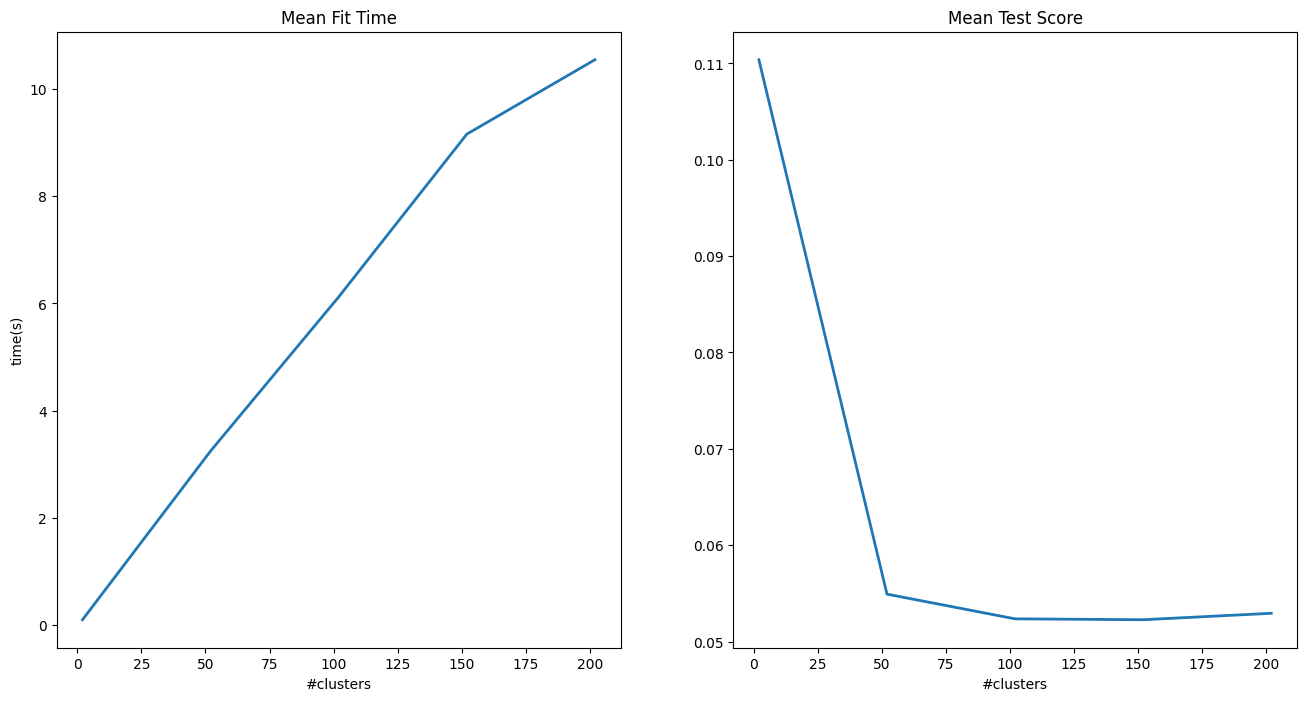

In [126]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(n_clusters, kmeans_grid_search.cv_results_["mean_fit_time"], linewidth=2)
plt.title("Mean Fit Time")
plt.xlabel("#clusters")
plt.ylabel("time(s)")

plt.subplot(1, 2, 2)
plt.plot(n_clusters, kmeans_grid_search.cv_results_["mean_test_score"], linewidth=2)
plt.title("Mean Test Score")
plt.xlabel("#clusters")

plt.show()

### DBSCAN
DBSCAN is an unsupervised clustering algorithm, offering an alternative to KMeans and hierarchical clustering. It relies on two key parameters: Epsilon (ɛ), defining the neighborhood radius, and Minimum Points (minPts), specifying the minimum number of points to form a cluster. Epsilon determines the similarity threshold between points, influencing cluster size, while minPts affects cluster robustness and noise handling.  
Balancing these parameters is crucial for effective clustering without splitting valid clusters or aggregating unrelated points

In [133]:
from sklearn.cluster import DBSCAN

eps = np.arange(2) * 0.1 + 0.1
min_samples = np.arange(2) * 1 + 6

dbscan_grid_search = do_grid_search(DBSCAN(), {
    'eps': eps,
    'min_samples': min_samples
})

optimal_eps = dbscan_grid_search.best_params_['eps']
optimal_min_samples = dbscan_grid_search.best_params_['min_samples']
optimal_dbscan = dbscan_grid_search.best_estimator_
print(f'Optimal epsilon for DBSCAN algorithm: {optimal_eps}')
print(f'Optimal minPts for DBSCAN algorithm: {optimal_min_samples}')

/home/lotov2000/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lotov2000/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_122064/3748867959.py", line 7, in <lambda>
    scoring=lambda _estimator, _x: silhouette_score(_x, _estimator.fit_predict(_x)),
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lotov2000/.local/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/home/lotov2000/.local/lib/python3.12/site-packages/sklearn/metrics/cluster/_unsupervised.py", line 130, in silhouette_score

KeyboardInterrupt: 

In [ ]:
dbscan_grid_search.cv_results_

In [129]:
eps_mean_test_score = np.array(list(map(
    lambda e: np.mean([x for i, x in enumerate(dbscan_grid_search.cv_results_["mean_test_score"])
                       if dbscan_grid_search.cv_results_["params"][i]["eps"] == e]), eps)))
eps_mean_test_score

array([nan, nan, nan])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

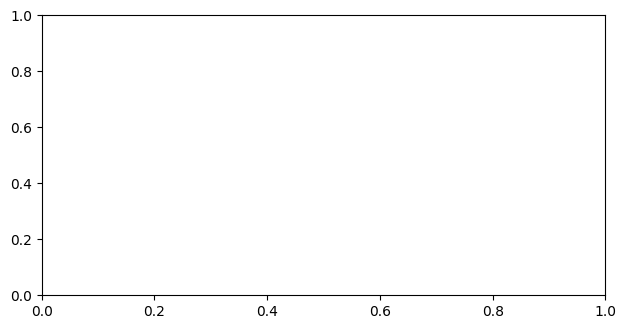

In [134]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.plot(eps, eps_mean_test_score["mean_fit_time"])
plt.title("Mean Fit Time")
plt.xlabel("#clusters")
plt.ylabel("time(s)")

plt.subplot(2, 2, 2)
plt.plot(eps, eps_mean_test_score["mean_test_score"])
plt.title("Mean Test Score")
plt.xlabel("#clusters")

plt.show()

# Questions

#### 1. What preprocessing steps did you perform on the dataset? Provide clear reasons for each decision made.

1. **Loading Data and Initial Exploration:**  
Understand the dataset's structure, identify missing values, and get an overview of the data types and distribution.

2. **Handling Missing Values:**
Ensure the dataset is complete by imputing or removing missing values to avoid biases and errors during analysis.

4. **Encoding Categorical Variables:**
Convert categorical data to numerical format using One-Hot Encoding, making it suitable for machine learning algorithms without implying any ordinal relationships.

5. **Normalizing Numerical Features:**
Scale numerical features to ensure equal contribution to the analysis and improve algorithm performance, particularly for algorithms sensitive to data scales.
  
4. **Removing Columns with Highly Repeated Data:**  
Columns where the mode (most frequent value) constitutes a very high percentage (95%) of the data provide little to no information for analysis and can be removed to reduce noise.   

5. **Removing ID Columns:**  
Columns that are purely identifiers are not useful for analysis and can introduce noise, so they should be removed.

#### 2. What portion of the dataset did you retain during dimensionality reduction, and which variables were retained? Could you elaborate on the rationale behind this decision?


1. **Portion of the Dataset Retained:**
   - **Principal Components:** Retained a subset of the dataset's features by transforming them into principal components using Principal Component Analysis (PCA).
   - **Explained Variance:** Selected the number of components that collectively explain a significant portion (typically 90-95%) of the total variance.

2. **Rationale Behind the Decision:**
   - **Variance Preservation:** Ensured the reduced dataset retains most of the original variability, maintaining data quality and integrity.
   - **Simplification:** Reduced the number of features to simplify the model, improve computational efficiency, and enhance visualization.
   - **Performance Improvement:** Lowered the risk of overfitting and reduced noise by eliminating redundant information.
   - **Computational Efficiency:** Decreased the computational cost, making analysis and model training faster and more efficient.

#### 3. Include a plot illustrating the silhouette coefficient plotted against the input parameters for each clustering method within the report file.

#### 4. How can we determine the optimal number of clusters in K-Means?

##### General Methods:

1. **Elbow Method:**
   - **Description:** Plot the within-cluster sum of squares (WCSS) against the number of clusters (K). The WCSS typically decreases as K increases. The optimal number of clusters is often at the "elbow" point where the rate of decrease sharply slows.
   - **Steps:**
     1. Compute K-Means clustering for different values of K (e.g., 1 to 10).
     2. Calculate the WCSS for each K.
     3. Plot WCSS vs. K and identify the elbow point.

2. **Silhouette Score:**
   - **Description:** Measure the quality of clustering by calculating the mean silhouette coefficient for each sample. The silhouette score ranges from -1 to 1, where higher values indicate better-defined clusters.
   - **Steps:**
     1. Compute K-Means clustering for different values of K.
     2. Calculate the silhouette score for each K.
     3. Plot the silhouette score vs. K and choose the K with the highest score.

3. **Gap Statistic:**
   - **Description:** Compare the total within intra-cluster variation for different numbers of clusters with their expected values under null reference distribution of the data.
   - **Steps:**
     1. Compute the gap statistic for a range of K values.
     2. Plot the gap statistic vs. K.
     3. The optimal number of clusters is where the gap statistic is largest.

##### Using Grid Search with Silhouette Score:

Grid search can be used to automate the process of finding the optimal number of clusters by systematically evaluating different K values and selecting the one that maximizes the silhouette score.
Using grid search with the silhouette score is an effective method to systematically find the optimal number of clusters by evaluating different K values and selecting the one that maximizes the silhouette score.

#### 5. How can we determine the optimal epsilon value and minPts in DBSCAN?

To determine the optimal $\epsilon$ and minPts values for DBSCAN, we can follow a systematic approach. Here's how we can do it:

##### Step-by-Step Method:

1. **Set Initial minPts Value**:
   - Start by choosing an initial value for minPts. A common heuristic is to set minPts to be at least $D+1$, where $D$ is the number of dimensions in our dataset.

2. **Use Grid Search for $\epsilon$**:
   - Perform a grid search over a range of $\epsilon$ values to find the one that results in the best clustering performance. This allows us to systematically explore different $\epsilon$ values.
   - Here's a general method using a k-distance graph to guide the range of $\epsilon$ values:

##### General Method for Finding \(\epsilon\) (Using k-Distance Graph):

**k-Distance Graph**:
   - Compute the distance to the $k$-th nearest neighbor for each point, where $k$ is typically set to minPts.
   - Sort these distances and plot them to create a k-distance graph.
   - The "elbow" point on this graph often indicates a good candidate for $\epsilon$, as it represents a threshold where points start to be considered noise.



#### 6. When would you recommend using K-Means, and when would you suggest using DBSCAN instead

- Use K-Means when we have well-separated, equally sized clusters, can specify the number of clusters beforehand, and are working with large, numerical datasets.
- Use DBSCAN when we have arbitrary shaped clusters, noise and outliers in our data, varying densities, and do not want to specify the number of clusters in advance.


##### When to Use K-Means:
1. **Well-Separated Clusters**:
   - K-Means performs well when clusters are spherical and equally sized. If our data is expected to have well-separated, evenly sized clusters, K-Means is a good choice.

2. **Scalability**:
   - K-Means is computationally efficient and scales well with large datasets. If we need to cluster a large dataset quickly, K-Means is preferable.

3. **Numerical Data**:
   - K-Means works best with numerical data where the mean is a meaningful measure of central tendency.

4. **Predefined Number of Clusters**:
   - Use K-Means when we have a predefined number of clusters (K). K-Means requires the number of clusters to be specified in advance.

5. **Low Dimensionality**:
   - K-Means is more effective in lower-dimensional spaces. In high-dimensional spaces, distance metrics may become less meaningful.

##### When to Use DBSCAN:
1. **Arbitrary Shaped Clusters**:
   - DBSCAN can find clusters of arbitrary shape, including elongated or irregularly shaped clusters. If our data has clusters that are not spherical, DBSCAN is more suitable.

2. **Handling Noise**:
   - DBSCAN is robust to noise and can identify outliers as noise points. If our data contains a lot of noise or outliers, DBSCAN is a better choice.

3. **Varying Densities**:
   - DBSCAN can handle clusters of varying densities. If our data has clusters with different densities, DBSCAN can effectively identify them.

4. **No Need for Predefined Clusters**:
   - Unlike K-Means, DBSCAN does not require the number of clusters to be specified in advance. If we do not have prior knowledge of the number of clusters, DBSCAN is advantageous.

5. **Medium to Small Datasets**:
   - DBSCAN is computationally more expensive than K-Means and may not scale well with very large datasets. It works better with medium to small datasets.

6. **Dimensionality Consideration**:
   - DBSCAN can struggle with very high-dimensional data, similar to K-Means. However, DBSCAN’s performance is particularly sensitive to the choice of distance metric and parameters (epsilon and minimum points).


# References:
https://www.newhorizons.com/resources/blog/dbscan-vs-kmeans-a-guide-in-python   
https://hex.tech/blog/comparing-density-based-methods/